In [1]:
import os
import io
from PIL import Image
from keras.models import load_model
import numpy as np

Using TensorFlow backend.


In [2]:
def get_cur_dir():
    #Hack to get path of Notebook (Data file is in same directory structure)
    
    if '_dh' in globals():
        current_folder = globals()['_dh'][0]
    else:
        script_path=__file__
        current_folder=dirname(script_path)
    return current_folder
    

def get_data_dir():
    data_dir = os.path.join(get_cur_dir(),'..','data','set1')
    return os.path.normpath(data_dir)


def get_model_dir():
    model_dir = os.path.join(get_data_dir(),'model')
    return os.path.normpath(model_dir)


def get_model_file():
    model_dir = os.path.join(get_model_dir(),'trained_model_v1.h5')
    return os.path.normpath(model_dir)
    
def get_image(imgId):
    img_path = os.path.join(get_data_dir() , 'capture',str(imgId)+'.png')
    img_path = os.path.normpath(img_path)
    im = Image.open(img_path)
    return im

In [3]:
def get_model():
    model = load_model(get_model_file())
    return model


In [4]:
model=get_model()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.


In [5]:
img=get_image(500)

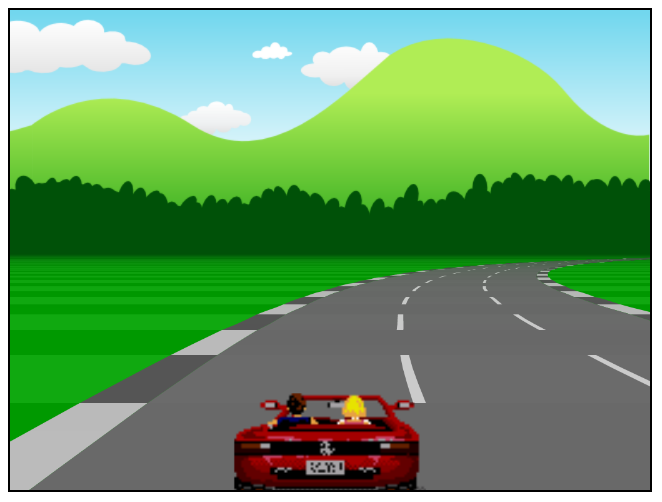

In [6]:
img

In [15]:
    image_dim = (256, 256)
    img = img.resize(image_dim, Image.LANCZOS)
    img=img.convert('L')
    img_arr = np.array(img)
    img_arr=img_arr.reshape(image_dim[0],image_dim[1],1)
    test_x=np.array([img_arr])
    output=model.predict(test_x)

In [9]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 254, 254, 32)      320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 127, 127, 32)      0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 127, 127, 32)      128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 125, 125, 64)      18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 62, 62, 64)        256       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 60, 60, 64)        36928     
__________

In [16]:
output

array([[4.5569608e-04, 3.4676853e-04, 4.1134292e-03, 9.9508411e-01]],
      dtype=float32)

In [17]:
np.argmax(output)

3

In [30]:
classes=['Accelerate', 'TurnLeft', 'TurnRight', 'DoNothing']

In [34]:
action=classes[np.argmax(output)]

In [35]:
classes

['Accelerate', 'TurnLeft', 'TurnRight', 'DoNothing']

In [36]:
action

'DoNothing'